<a href="https://colab.research.google.com/github/malaniekcline/College-Algebra-with-Python/blob/main/Data_Graph_Explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving users.csv to users.csv


Choose how to load the CSV (upload, url, code): upload
Enter the full path to your CSV file: /content/users.csv
Headings:
 Index(['user_id', 'location', 'hobbies', 'favorite_foods', 'birth_date',
       'join_date', 'gender'],
      dtype='object')
First two rows:
    user_id     location  hobbies favorite_foods  birth_date  join_date gender
0        1  PO Box 6540  cooking          salad   2/18/1939  5/15/2021   Male
1        2   18th Floor   hiking          salad  11/22/1945   8/5/2013   Male
Available columns: ['user_id', 'location', 'hobbies', 'favorite_foods', 'birth_date', 'join_date', 'gender']
Choose the first column: location
Choose the second column (optional): hobbies


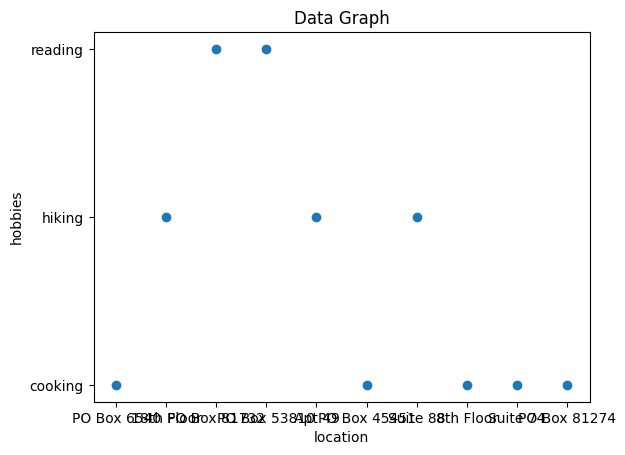

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_csv(method="upload"):
    if method == "upload":
        file_path = input("Enter the full path to your CSV file: ")
        try:
            df = pd.read_csv(file_path)
        except FileNotFoundError:
            print("File not found. Please check the path and try again.")
            return None
    elif method == "url":
        url = input("Enter the CSV file URL: ")
        df = pd.read_csv(url)
    elif method == "code":
        url = "https://my.api.mockaroo.com/users.csv?key=3b5f9220"  # Mockaroo API URL
        df = pd.read_csv(url)
    else:
        print("Invalid method. Choose from 'upload', 'url', or 'code'")
        return None
    return df

def display_info(df):
    """Displays basic information about the DataFrame."""
    print("Headings:\n", df.columns)
    print("First two rows:\n", df.head(2))

def select_columns(df):
    """Gets column choices from the user."""
    column_list = list(df.columns)
    print("Available columns:", column_list)
    col1 = input("Choose the first column: ")
    col2 = input("Choose the second column (optional): ")
    return col1, col2

def create_graph(df, col1, col2=None):
    """Creates a graph based on column selection."""
    data1 = df[col1].to_numpy()

    if col2:
        data2 = df[col2].to_numpy()
        plt.scatter(data1, data2)
        plt.xlabel(col1)
        plt.ylabel(col2)
    else:
        plt.plot(data1)
        plt.xlabel("Index")  # Use col1 if available
        plt.ylabel(col1)

    plt.title("Data Graph")
    plt.show()

# Load CSV data
method = input("Choose how to load the CSV (upload, url, code): ")
df = load_csv(method)

if df is not None:  # Only proceed if loading was successful
    # Display basic information
    display_info(df)

    # Column selection and graph creation
    col1, col2 = select_columns(df)
    create_graph(df, col1, col2)